<h1><center>Project - Python for Machine Learning</center>
<center>Retinal Defect Classification using CNN from OCT images</center></h1>

#### Import Modules

In [1]:
# Importing required Libraries
import os
import numpy as np 
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt

#### Setting the path and Loading the Data

In [2]:
# Setting the path
path = 'C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/'

# Loading the Training Data
train_path = os.path.join(path,'train/')
train_normal_pth = os.path.join(train_path, 'NORMAL')
train_dme_pth = os.path.join(train_path, 'DME')
train_drusen_pth = os.path.join(train_path, 'DRUSEN')
train_cnv_pth = os.path.join(train_path, 'CNV')

# Loading the Testing Data
test_path = os.path.join(path, 'test/')
test_normal_pth = os.path.join(test_path, 'NORMAL')
test_dme_pth = os.path.join(test_path, 'DME')
test_drusen_pth = os.path.join(test_path, 'DRUSEN')
test_cnv_pth = os.path.join(test_path, 'CNV')

# Loading the Validating Data
val_path = os.path.join(path, 'val/')
val_normal_pth = os.path.join(val_path, 'NORMAL')
val_dme_pth = os.path.join(val_path, 'DME')
val_drusen_pth = os.path.join(val_path, 'DRUSEN')
val_cnv_pth = os.path.join(val_path, 'CNV')

#### Verification of Data by displaying the Data

In [3]:
# Function to display the loaded data
def plot_imgs(item_dir, num_imgs=4):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(16, 16))
    for idx, img_path in enumerate(item_files):
        plt.subplot(1, 4, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img, cmap='bone')

    plt.tight_layout()

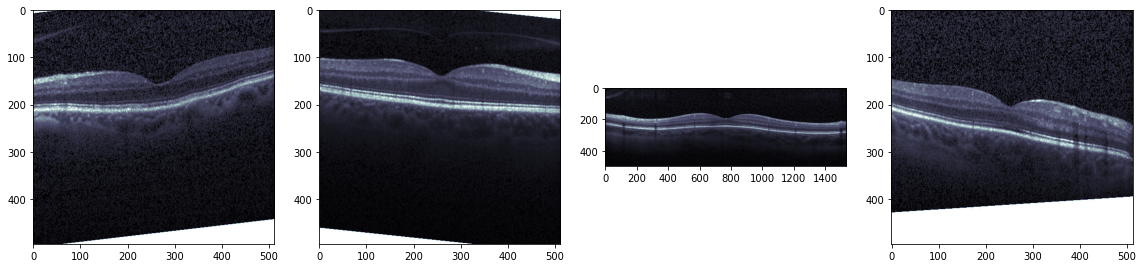

In [4]:
plot_imgs(train_normal_pth)

Data from Normal Catergory in Training Set

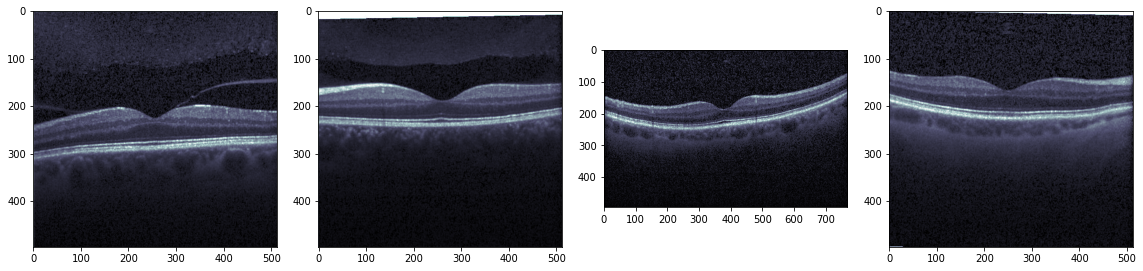

In [5]:
plot_imgs(test_normal_pth)

Data from Normal Catergory in Test Set

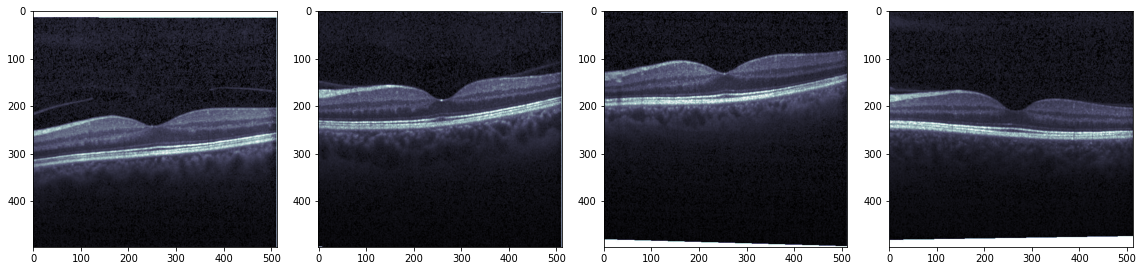

In [6]:
plot_imgs(val_normal_pth)

Data from Normal Catergory in Validation Set

#### Taking the details of Data

In [7]:
# Function to take the dimensions of images
import glob
from PIL import Image
def Images_details_Print_data(data, path):
    print("Image path : ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100
    data['max_width'] = 0
    data['min_height'] = 10**100
    data['max_height'] = 0

    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['min_height'] = min(height, data['min_height'])
        data['max_width'] = max(width, data['max_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

In [8]:
Images_details(train_normal_pth)
Images_details(train_dme_pth)
Images_details(train_drusen_pth)
Images_details(train_cnv_pth)

Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/train/NORMAL
images_count:	26315
min_width:	384
max_width:	512
min_height:	496
max_height:	512
Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/train/DME
images_count:	11348
min_width:	512
max_width:	512
min_height:	496
max_height:	512
Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/train/DRUSEN
images_count:	8616
min_width:	512
max_width:	768
min_height:	496
max_height:	496
Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/train/CNV
images_count:	37205
min_width:	384
max_width:	1536
min_height:	496
max_height:	496


Details from Training Set

In [9]:
Images_details(test_normal_pth)
Images_details(test_dme_pth)
Images_details(test_drusen_pth)
Images_details(test_cnv_pth)

Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/test/NORMAL
images_count:	242
min_width:	512
max_width:	512
min_height:	496
max_height:	496
Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/test/DME
images_count:	242
min_width:	512
max_width:	768
min_height:	496
max_height:	496
Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/test/DRUSEN
images_count:	242
min_width:	512
max_width:	512
min_height:	496
max_height:	496
Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/test/CNV
images_count:	242
min_width:	512
max_width:	512
min_height:	496
max_height:	496


Details from Testing Set

In [10]:
Images_details(val_normal_pth)
Images_details(val_dme_pth)
Images_details(val_drusen_pth)
Images_details(val_cnv_pth)

Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/val/NORMAL
images_count:	8
min_width:	512
max_width:	512
min_height:	496
max_height:	496
Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/val/DME
images_count:	8
min_width:	512
max_width:	768
min_height:	496
max_height:	496
Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/val/DRUSEN
images_count:	8
min_width:	512
max_width:	512
min_height:	496
max_height:	496
Image path :  C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/val/CNV
images_count:	8
min_width:	512
max_width:	768
min_height:	496
max_height:	496


Details from Validation Set

In [11]:
in_path = 'C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/'

for _set in ['train', 'test', 'val']:
    normal = len(os.listdir(in_path + _set + '/NORMAL'))
    dme = len(os.listdir(in_path + _set + '/DME'))
    drusen = len(os.listdir(in_path + _set + '/DRUSEN'))
    cnv = len(os.listdir(in_path + _set + '/CNV'))
    print('{}, Normal images: {}, DME images: {}, DRUSEN images: {}, CNV images: {}'.format(_set, normal, dme, drusen, cnv))

train, Normal images: 26315, DME images: 11348, DRUSEN images: 8616, CNV images: 37205
test, Normal images: 242, DME images: 243, DRUSEN images: 243, CNV images: 243
val, Normal images: 8, DME images: 9, DRUSEN images: 9, CNV images: 9


In [12]:
datadir = in_path
traindir = datadir + 'train/'
validdir = datadir + 'val/'
testdir = datadir + 'test/'

In [13]:
# Function to summarise the details of Dataset into a Dataframe
categories = []
img_categories = []
n_train = []
n_valid = []
n_test = []
hs = []
ws = []

for d in os.listdir(traindir):
    categories.append(d)

    train_imgs = os.listdir(traindir + d)
    valid_imgs = os.listdir(validdir + d)
    test_imgs = os.listdir(testdir + d)
    n_train.append(len(train_imgs))
    n_valid.append(len(valid_imgs))
    n_test.append(len(test_imgs))

    for i in train_imgs:
        img_categories.append(d)
        img = Image.open(traindir + d + '/' + i)
        img_array = np.array(img)
        hs.append(img_array.shape[0])
        ws.append(img_array.shape[1])

cat_df = pd.DataFrame({'category': categories,'n_train': n_train,'n_valid': n_valid, 'n_test': n_test}).sort_values('category')
image_df = pd.DataFrame({'category': img_categories,'height': hs,'width': ws})
cat_df.sort_values('n_train', ascending=False, inplace=True)
cat_df.head()

,category,n_train,n_valid,n_test
0,CNV,37205,9,243
3,NORMAL,26315,8,242
1,DME,11348,9,243
2,DRUSEN,8616,9,243


#### Statistics of Dataset

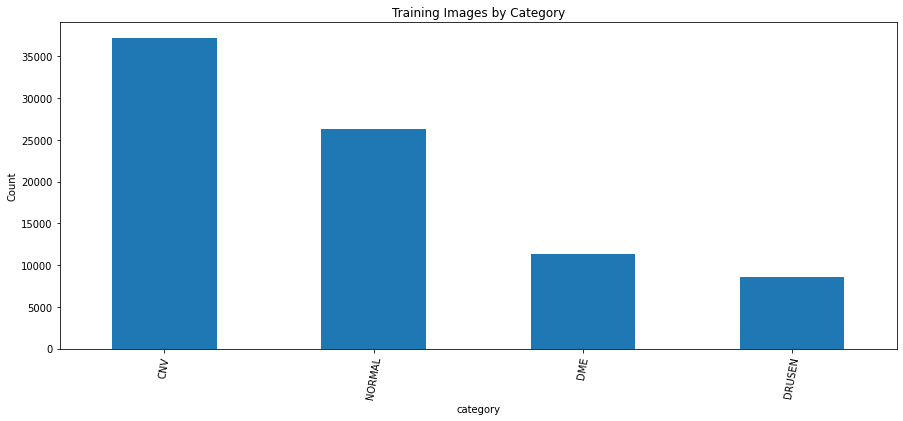

In [14]:
cat_df.set_index('category')['n_train'].plot.bar(figsize=(15, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Images by Category')
plt.show()

In [15]:
img_dsc = image_df.groupby('category').describe()
img_dsc.head()

height                                                           \
            count        mean       std    min    25%    50%    75%    max   
category                                                                     
CNV       37205.0  496.000000  0.000000  496.0  496.0  496.0  496.0  496.0   
DME       11348.0  508.208671  6.803761  496.0  512.0  512.0  512.0  512.0   
DRUSEN     8616.0  496.000000  0.000000  496.0  496.0  496.0  496.0  496.0   
NORMAL    26315.0  500.132700  7.003275  496.0  496.0  496.0  512.0  512.0   

            width                                                              
            count        mean         std    min    25%    50%    75%     max  
category                                                                       
CNV       37205.0  736.372423  338.497157  384.0  512.0  512.0  768.0  1536.0  
DME       11348.0  564.788157  191.861512  512.0  512.0  512.0  512.0  1536.0  
DRUSEN     8616.0  670.692665  280.842588  512.0  512.0  512.0  768.0  1536.0  
NORMAL    26315.0  659.670606  288.606761  384.0  512.0  512.0  768.0  1536.0

Text(0.5, 1.0, 'Average Size Distribution')

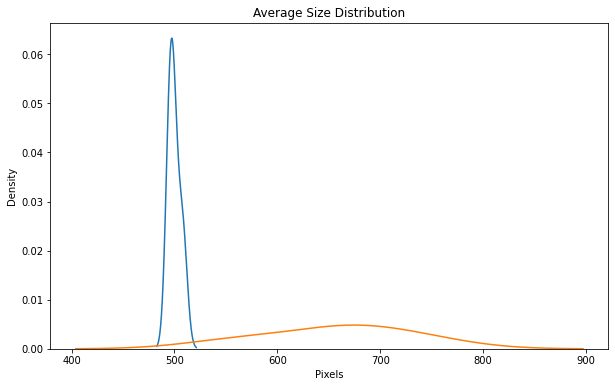

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(img_dsc['height']['mean'], label='Average Height')
sns.kdeplot(img_dsc['width']['mean'], label='Average Width')
plt.xlabel('Pixels')
plt.ylabel('Density')
plt.title('Average Size Distribution')

#### Building a CNN Model

In [17]:
# Importing required Libraries
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
import tensorflow
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

#### Build a model architecture (Sequential) with Dense layers

In [18]:
# Model Parameters
image_size = 256
batch_size = 16
num_classes = 4
epochs = 10

In [19]:
# baseline model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [20]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [21]:
filepath="weights_baseline.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [22]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2, 
      height_shift_range = 0.2,
      shear_range = 0.2,       
      zoom_range = 0.2,       
      horizontal_flip = True,
      fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 100
)

Found 83484 images belonging to 4 classes.


In [23]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_path,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 968 images belonging to 4 classes.


#### Train the model

In [24]:
history = model.fit(
      train_generator,
      steps_per_epoch = np.ceil(83484/100),  # 83484 images = batch_size * steps
      epochs = 10,
      validation_data=validation_generator,
      validation_steps = np.ceil(968/20),  # 968 images = batch_size * steps
      verbose = 1)

Epoch 1/10
835/835 [==============================] - 3171s 4s/step - loss: 0.7424 - accuracy: 0.7153 - val_loss: 0.6115 - val_accuracy: 0.7717
Epoch 2/10
835/835 [==============================] - 3129s 4s/step - loss: 0.4253 - accuracy: 0.8472 - val_loss: 0.1954 - val_accuracy: 0.9380
Epoch 3/10
835/835 [==============================] - 3149s 4s/step - loss: 0.3301 - accuracy: 0.8854 - val_loss: 0.1696 - val_accuracy: 0.9514
Epoch 4/10
835/835 [==============================] - 3126s 4s/step - loss: 0.2922 - accuracy: 0.8986 - val_loss: 0.1350 - val_accuracy: 0.9628
Epoch 5/10
835/835 [==============================] - 3131s 4s/step - loss: 0.2679 - accuracy: 0.9072 - val_loss: 0.1055 - val_accuracy: 0.9638
Epoch 6/10
835/835 [==============================] - 3106s 4s/step - loss: 0.2542 - accuracy: 0.9120 - val_loss: 0.0687 - val_accuracy: 0.9804
Epoch 7/10
835/835 [==============================] - 3093s 4s/step - loss: 0.2427 - accuracy: 0.9164 - val_loss: 0.1250 - val_accuracy:

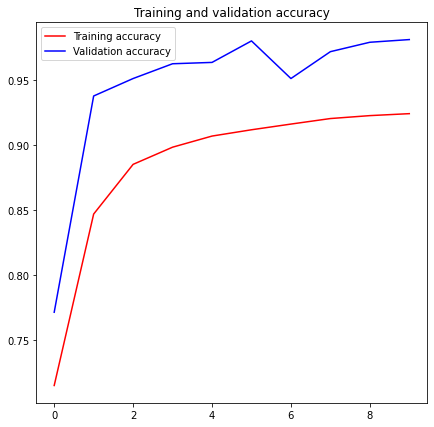

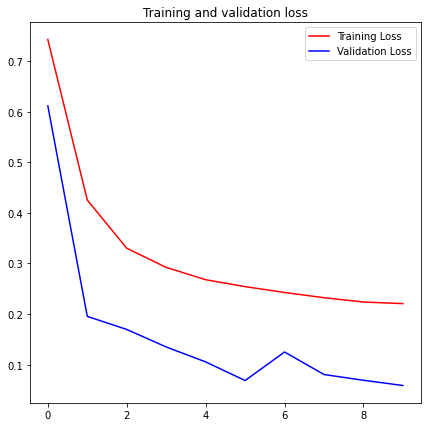

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Test the Model

In [26]:
dest_path = 'C:/Users/Acer/Documents/Python Scripts/Machine Learning/Project/test_working'

In [27]:
import os
import shutil
dest = dest_path
for i in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
    src = os.path.join(val_path, i)
    src_files = os.listdir(src)
    for file_name in src_files:
        if(file_name != ".DS_Store"):
            full_file_name = os.path.join(src, file_name)
            if os.path.isfile(full_file_name):
                shutil.copy(full_file_name, dest)

In [28]:
len(os.listdir(dest))

32

In [29]:
test_img = os.listdir(dest)

test_df = pd.DataFrame({'Image': test_img})
test_df

,Image
0,CNV-6294785-1.jpeg
1,CNV-6294785-2.jpeg
2,CNV-6652117-1.jpeg
3,CNV-6668596-1.jpeg
4,CNV-6851127-1.jpeg
5,CNV-6875371-1.jpeg
6,CNV-8184974-1.jpeg
7,CNV-8598714-1.jpeg
8,DME-9583225-1.jpeg
9,DME-9583225-2.jpeg


In [30]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    dest, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 32 validated image filenames.


#### Results

In [31]:
predict = model.predict(test_generator, steps = int(np.ceil(32/20)))

In [32]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}

In [33]:
test_df['Label'] = np.argmax(predict, axis = -1)
test_df['Label'] = test_df['Label'].replace(label_map)

In [34]:
test_df

,Image,Label
0,CNV-6294785-1.jpeg,CNV
1,CNV-6294785-2.jpeg,DRUSEN
2,CNV-6652117-1.jpeg,CNV
3,CNV-6668596-1.jpeg,CNV
4,CNV-6851127-1.jpeg,CNV
5,CNV-6875371-1.jpeg,CNV
6,CNV-8184974-1.jpeg,CNV
7,CNV-8598714-1.jpeg,CNV
8,DME-9583225-1.jpeg,DME
9,DME-9583225-2.jpeg,DME


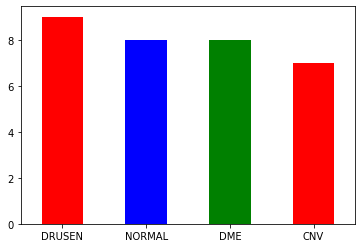

In [35]:
test_df.Label.value_counts().plot.bar(color = ['red','blue','green'])
plt.xticks(rotation = 0)
plt.show()

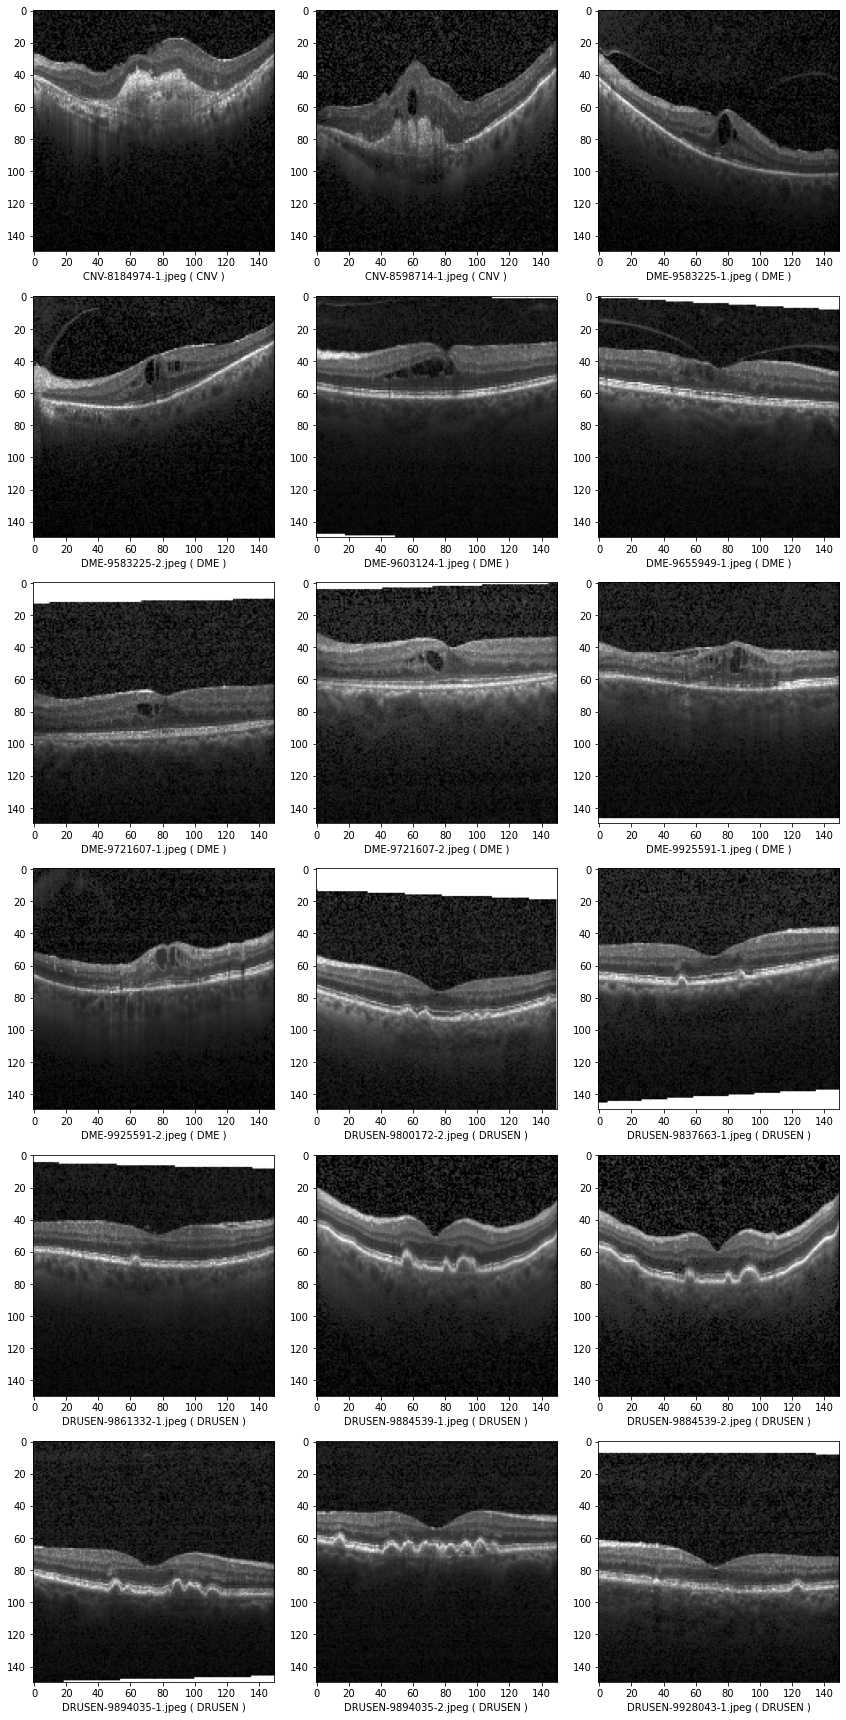

In [36]:
v = random.randint(0, 24)

sample_test = test_df.iloc[v:(v+18)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(dest +"/" + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

#### Accuracy

In [37]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)
print("Accuracy of the model on test data is {:.2f}%".format((sum(lis)/len(lis))*100))

Accuracy of the model on test data is 96.88%


<h3><center>Anjith Prakash Chathan Kandy</center>
<center>AM.EN.U4AIE19012</center></h3>